In [1]:
%matplotlib inline

Inspiration from recreating a re-creation:
- https://github.com/hrbrmstr/waffle
- http://www.nytimes.com/2008/07/20/business/20debt.html

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import wafflemaker

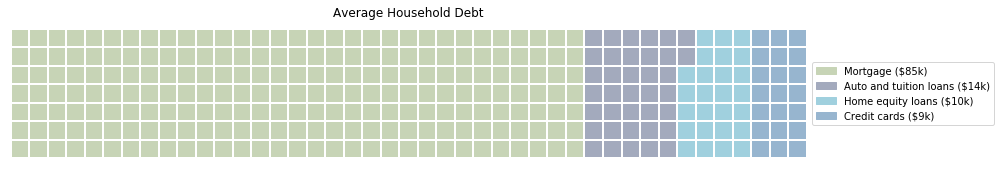

In [13]:
df = pd.DataFrame(dict(
    values=[84911, 14414, 10062, 8565],
    categories=['Mortgage ($85k)', 'Auto and tuition loans ($14k)', 'Home equity loans ($10k)', 'Credit cards ($9k)'],
    hues=["#c7d4b6", "#a3aabd", "#a0d0de", "#97b5cf"]
))

wafflemaker.waffle(
    7, 43,
    values='values',
    labels='categories',
    hue='hues',
    data=df,
    grid_options=dict(linewidth=2),
    figure_options=dict(figsize=(14, 5)),
    title='Average Household Debt'
)